In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
warnings.filterwarnings("ignore")

In [2]:
ds = pd.read_csv("housing.csv")

In [3]:
ds.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
ds.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [5]:
ds = ds.drop(columns = ["longitude","latitude"], axis=1)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  int64  
 1   total_rooms         20640 non-null  int64  
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  int64  
 4   households          20640 non-null  int64  
 5   median_income       20640 non-null  float64
 6   ocean_proximity     20640 non-null  object 
 7   median_house_value  20640 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


### Збалансування класів

In [7]:
ds["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
X = ds.drop('ocean_proximity', axis=1)
y = ds['ocean_proximity']

ros = RandomOverSampler(
    sampling_strategy='auto', 
    random_state=0,  
)  

X_res, y_res = ros.fit_resample(X, y)


ds = pd.concat([X_res, y_res], axis=1)


In [9]:
ds.head(10)
ds["ocean_proximity"].value_counts()

ocean_proximity
NEAR BAY      9136
<1H OCEAN     9136
INLAND        9136
NEAR OCEAN    9136
ISLAND        9136
Name: count, dtype: int64

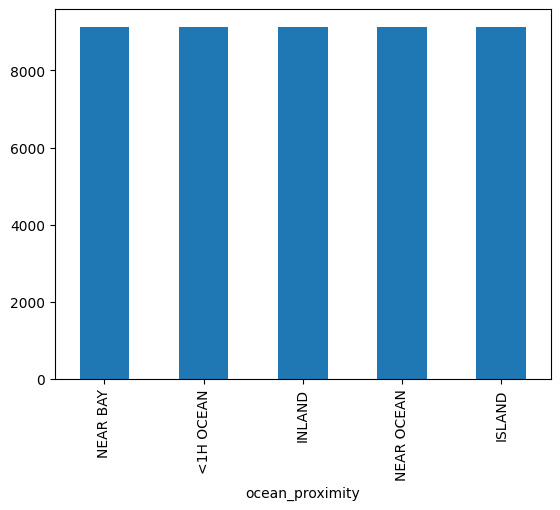

In [10]:
ds['ocean_proximity'].value_counts().plot(kind='bar')
plt.show()

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45680 entries, 0 to 45679
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  45680 non-null  int64  
 1   total_rooms         45680 non-null  int64  
 2   total_bedrooms      45298 non-null  float64
 3   population          45680 non-null  int64  
 4   households          45680 non-null  int64  
 5   median_income       45680 non-null  float64
 6   median_house_value  45680 non-null  int64  
 7   ocean_proximity     45680 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 2.8+ MB


### Заповнення пропущених значень

In [12]:
missing = []

for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(f'{x} {ds[x].isnull().sum()} - {ds[x].isnull().sum()*100/ds[x].sum()}%')
        missing.append(x)

total_bedrooms 382 - 0.0016535688430922464%


In [13]:
ds["total_bedrooms"]=ds["total_bedrooms"].fillna(ds["total_bedrooms"].median())

In [14]:
cols_to_scale = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value' ]

ds[cols_to_scale].describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000
mean,32.591156,2393.535267,509.522242,1229.801116,451.621651,3.664890,250705.802255
std,13.778783,1940.436027,371.142603,1006.656703,346.326568,1.787171,129939.537152
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,22.000000,1337.000000,277.000000,705.000000,260.000000,2.604200,141700.000000
50%,32.000000,2061.000000,454.000000,1012.000000,370.000000,3.246400,230800.000000
75%,45.000000,2800.000000,591.000000,1491.000000,540.000000,4.371400,345625.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Кодування категоріальних озник

In [15]:

encoder = OneHotEncoder(categories='auto',
                    sparse_output=False,
                       drop='first', 
                       handle_unknown='error') 

one_hot_cols = ['ocean_proximity']

encoder.fit(ds[one_hot_cols])

OneHotEncoder(drop='first', sparse_output=False)

In [16]:
tmp = encoder.transform(ds[one_hot_cols])

ohe_output = pd.DataFrame(tmp)
ohe_output.columns = encoder.get_feature_names_out(one_hot_cols)
ds = ds.drop(one_hot_cols, axis=1)
ds = pd.concat([ds, ohe_output], axis=1)

ds.head(5)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,880,129.0,322,126,8.3252,452600,0.0,0.0,1.0,0.0
1,21,7099,1106.0,2401,1138,8.3014,358500,0.0,0.0,1.0,0.0
2,52,1467,190.0,496,177,7.2574,352100,0.0,0.0,1.0,0.0
3,52,1274,235.0,558,219,5.6431,341300,0.0,0.0,1.0,0.0
4,52,1627,280.0,565,259,3.8462,342200,0.0,0.0,1.0,0.0


### Робота з шумами

In [17]:
# function to create histogram, Q-Q plot and


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

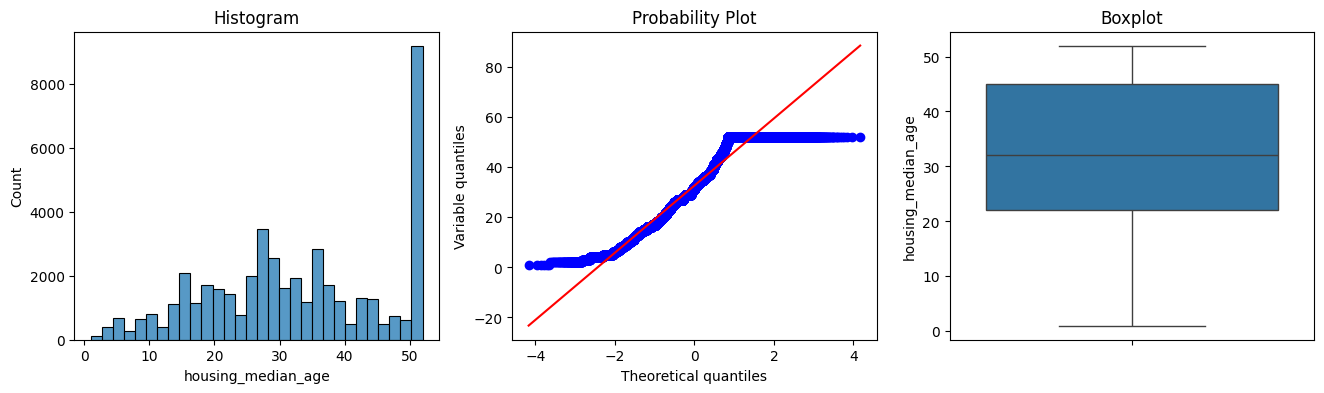

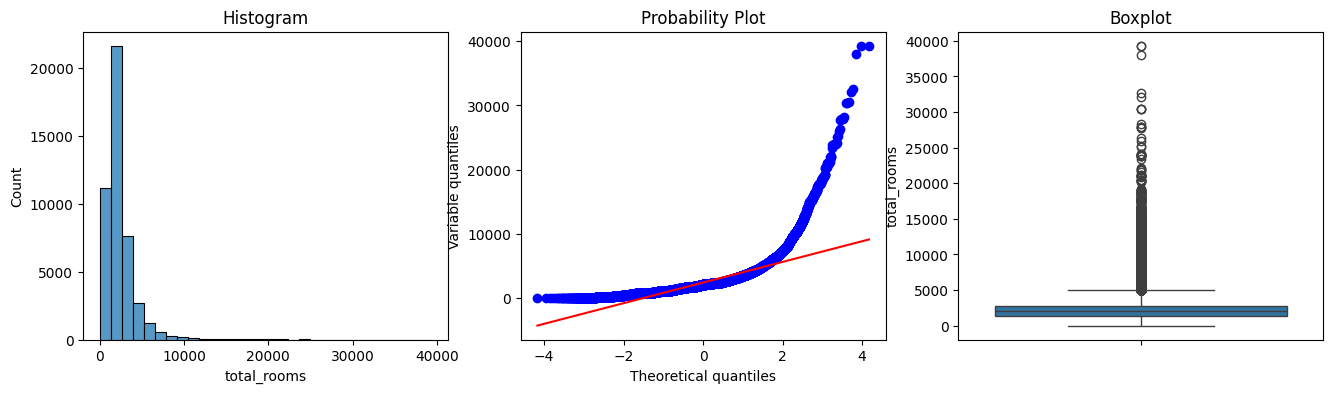

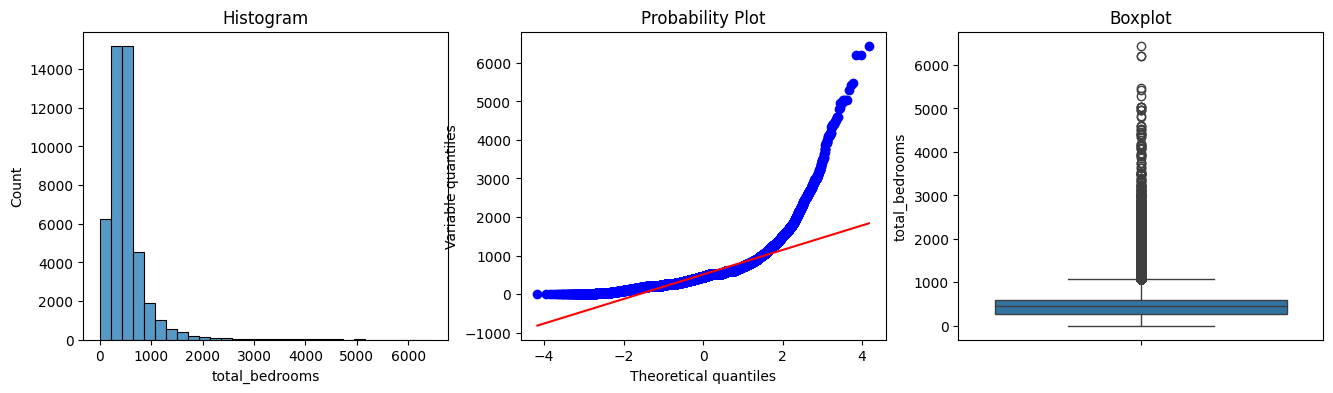

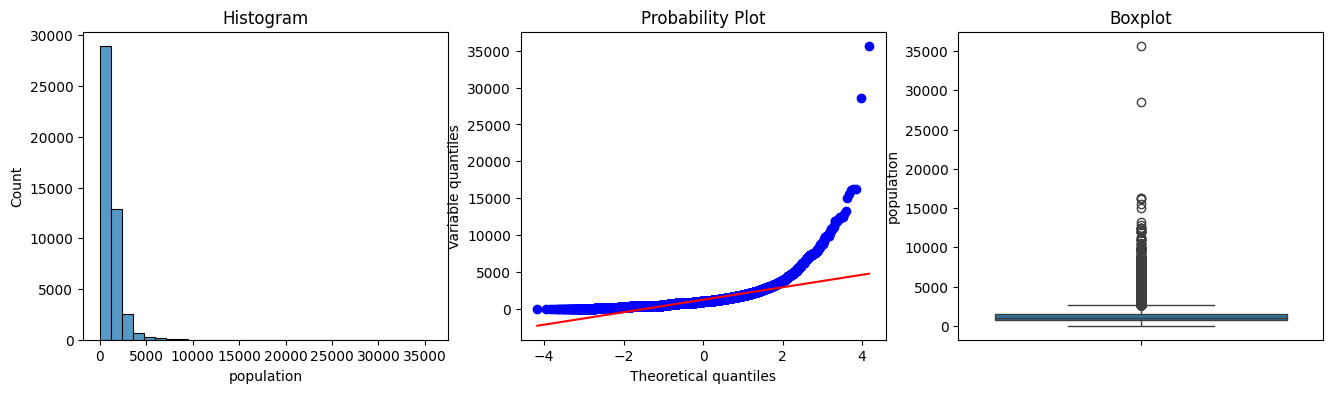

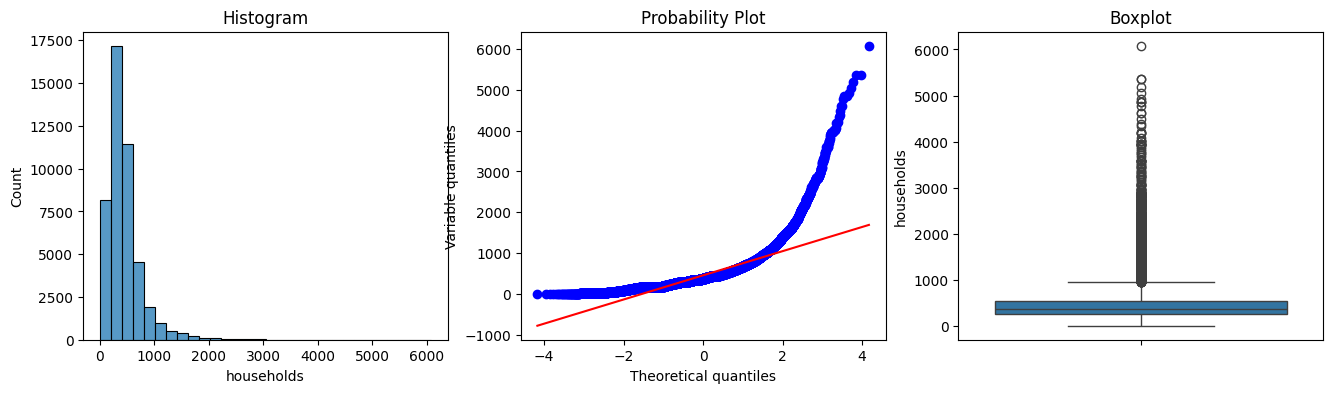

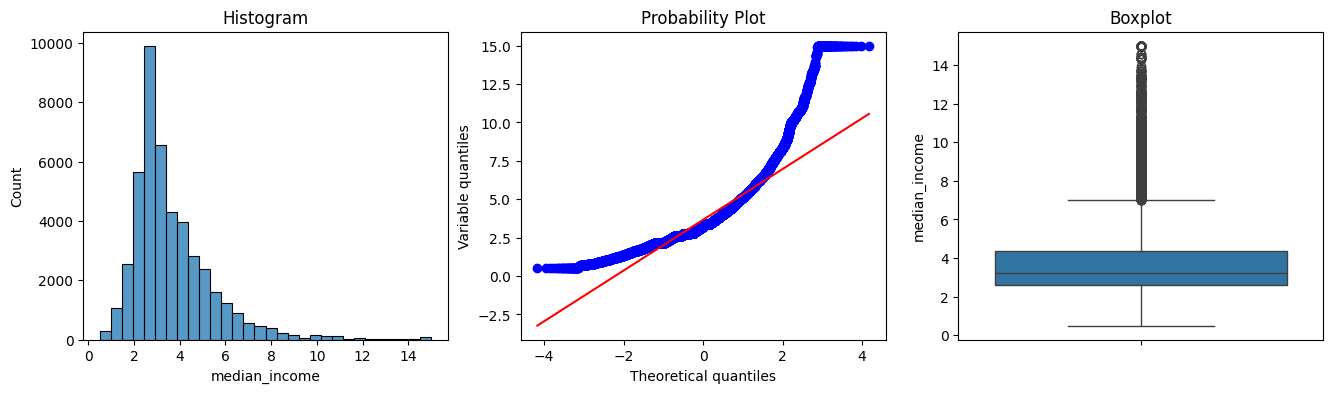

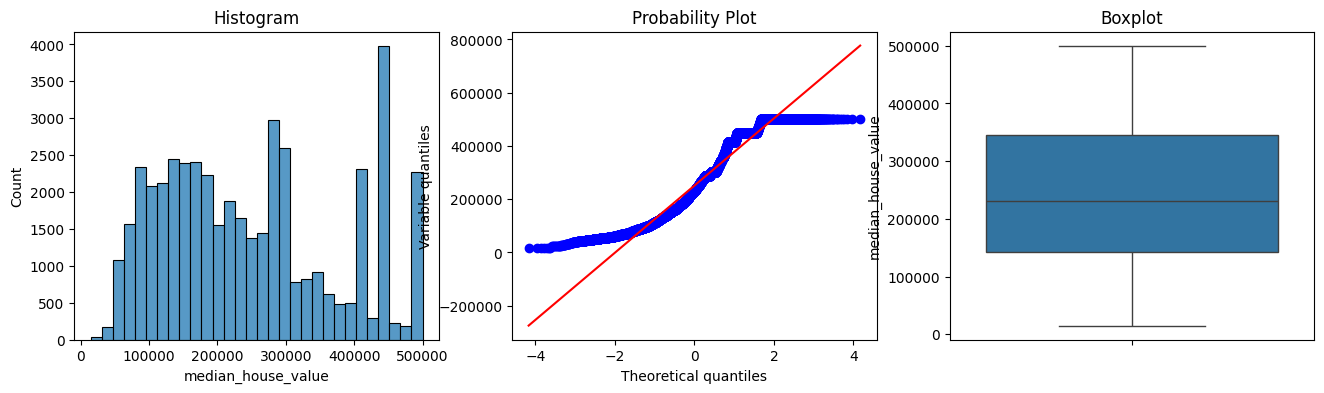

In [18]:
for variable in cols_to_scale:
    diagnostic_plots(ds, variable)


In [19]:
outliers_columns = ['total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',]

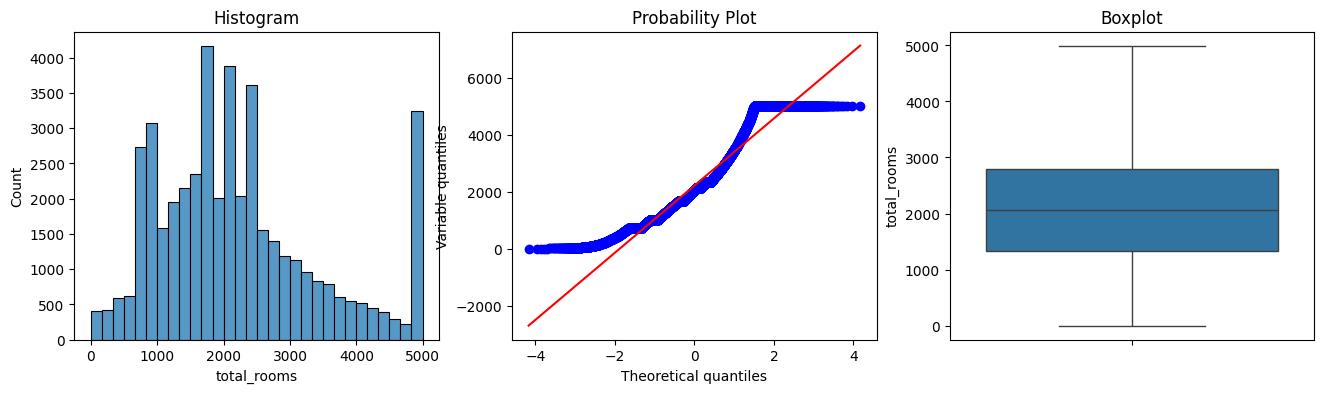

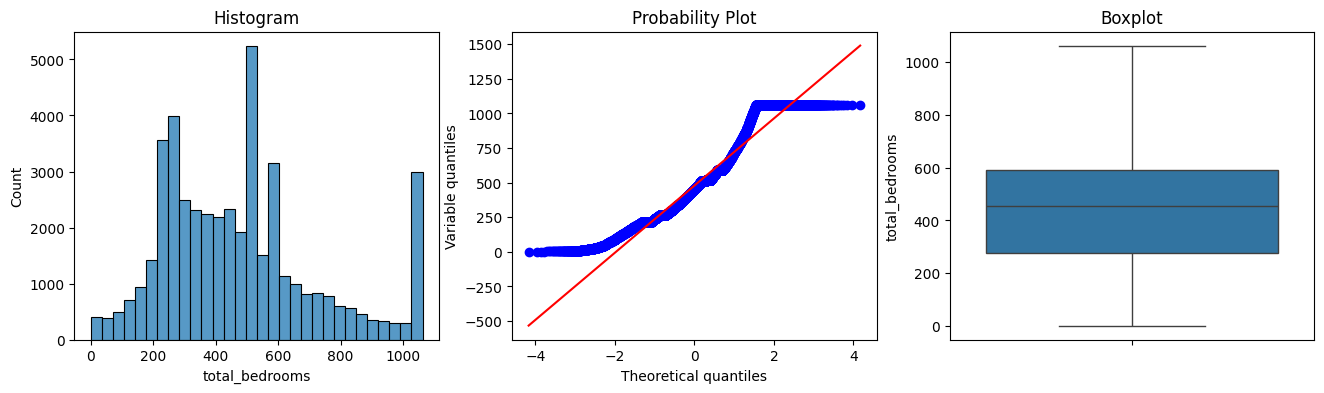

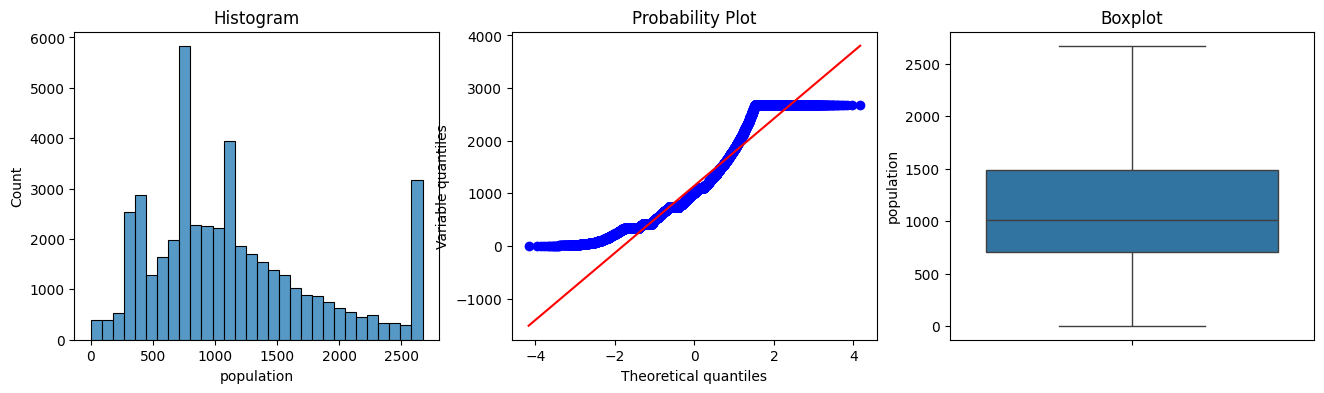

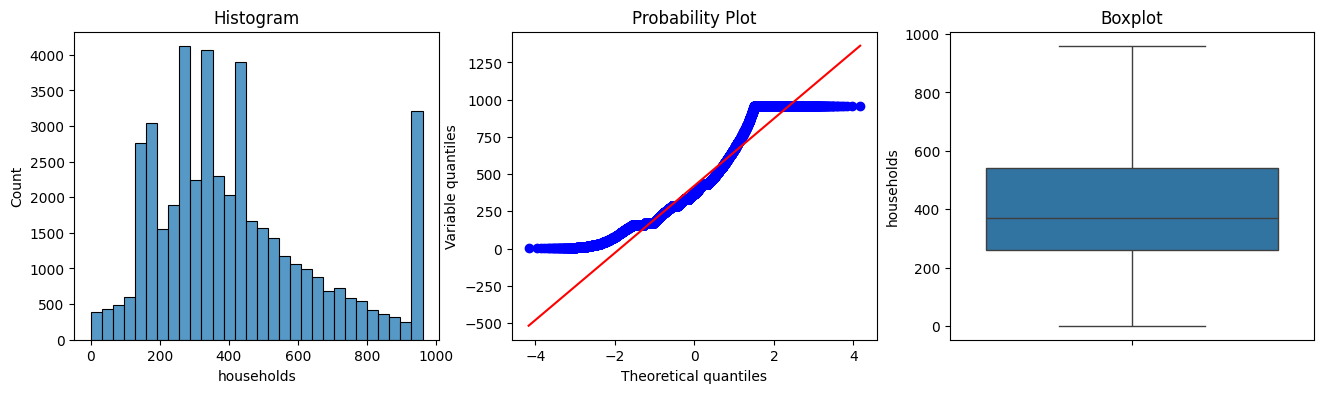

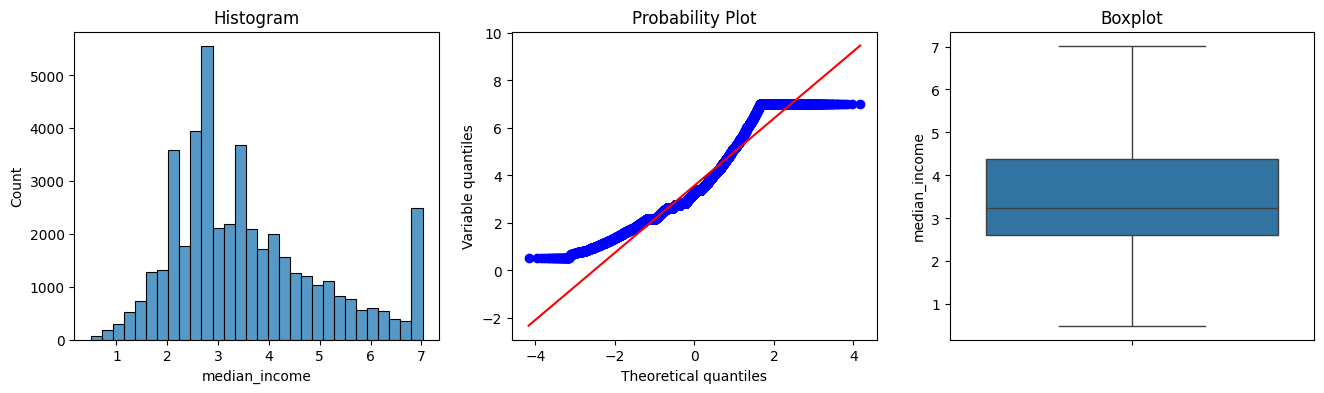

In [20]:
for column  in outliers_columns:
    
    Q1=ds[column].quantile(0.25)
    Q3=ds[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_limit=Q1-1.5*IQR
    Upper_limit=Q3+1.5*IQR
    ds[column][ds[column]<Lower_limit] =Lower_limit
    ds[column][ds[column]>Upper_limit] =Upper_limit
    diagnostic_plots(ds, column)



In [21]:
ds.head(5)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,880.0,129.0,322,126,7.0222,452600,0.0,0.0,1.0,0.0
1,21,4994.5,1062.0,2401,960,7.0222,358500,0.0,0.0,1.0,0.0
2,52,1467.0,190.0,496,177,7.0222,352100,0.0,0.0,1.0,0.0
3,52,1274.0,235.0,558,219,5.6431,341300,0.0,0.0,1.0,0.0
4,52,1627.0,280.0,565,259,3.8462,342200,0.0,0.0,1.0,0.0


### Збереження обролених даних

In [22]:
ds.to_csv('data_set.csv', index=False)